In [1]:
%run funcionesPruebas.ipynb
import matplotlib.pyplot as plt

In [12]:
px = [100000, 100000, 1000000, 10000000]

In [4]:
def shellSort(arr, gapFun):
    gaps = gapFun(len(arr))
    i = 0
    for gap in gaps:
        for i in range(gap, len(arr)):
            aux = arr[i]
            j=i
            while j >= gap and arr[j-gap] > aux:
                arr[j] = arr[j-gap]
                j = j - gap
            arr[j] = aux
    return arr

In [2]:
tiemposShellPy = [1.3071631345467267, 1.2729916313214744, 21.167767487028755, 312.3886231402437]
tiempoShellPyMs = [x*1000 for x in tiemposShellPy ]
tiemposSedgewickPy = [0.7861029216460338, 0.7861843489004059, 9.920059468938234, 119.89321010875801]
tiemposSedgewickPyMs = [x*1000 for x in tiemposSedgewickPy]
tiemposShellC= [5.89316,73.00185,1705.47233,38843.0858]
tiemposSedgewickC = [2.52702,38.88779,735.77110,14087.7429]


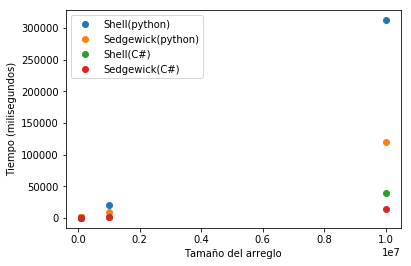

In [30]:
plt.plot(px, tiempoShellPyMs, 'o', label='Shell(python)')
plt.plot(px, tiemposSedgewickPyMs, 'o', label='Sedgewick(python)')
plt.plot(px, tiemposShellC, 'o', label='Shell(C#)')
plt.plot(px, tiemposSedgewickC, 'o', label='Sedgewick(C#)')
plt.ylabel('Tiempo (milisegundos)')
plt.xlabel('Tamaño del arreglo')
plt.legend()

In [3]:
import math
def gaps1(size):
    resp = []
    add = 10
    i = 1
    while (add >= 1):
        add = int(size/2**i)
        i = i + 1
        resp.append(add)
    return resp

def gaps2(size):
    resp = []
    k = 2
    add = 10
    while( add > 1):
        add = int(2 * math.floor(size / (2 ** k)) + 1)
        k = k + 1
        resp.append(add)
    return resp

def gaps3(size):
    add = 0
    i = 0
    resp = []
    while(add <= size/2):
        add = 2 ** i - 1
        i = i + 1
        resp.insert(0, add)
    return resp

def gaps4(size):
    add = 0
    i = 0
    resp = []
    while(add <= size/2):
        add = 2 ** i + 1
        i = i + 1
        resp.insert(0, add)
    return resp

def gaps5(size):
    add = 0
    i = 0
    resp = []
    while(add < math.ceil(size/3)):
        add = int((3 ** i - 1)/2)
        i = i + 1
        resp.insert(0, add)
    return resp

def gap6(size):
    add = 0
    i = 1
    resp = [1]
    while(add < size):
        add = int(4**i+3*2**(i-1)+1)
        i = i + 1
        if(add < size):
            resp.insert(0, add) 
    return resp

def gap7(size):
    add = 0
    i = 1
    resp = [1]
    while(add < size):
        if(i%2 == 0):
            #evens
            add = int(9 * (2 ** i - 2 ** (i/2)) + 1)
        else:
            #odds
            add = int(8 * 2 ** i - 6 * 2 ** ((i + 1) / 2) + 1)
        i = i + 1
        if(add < size):
            resp.insert(0, add) 
    return resp

In [5]:
gapFunctions = [gaps1, gaps2, gaps3, gaps4, gaps5, gap6, gap7]


In [12]:
px2 = [2**x for x in range(3,20)]

In [13]:
def pruebasShellSort(gapFunks, px):
    resp = []
    for gapf in gapFunks:
        def shellSortTest(arr):
            shellSort(arr, gapf)
        resp.append(correPruebas(shellSortTest, px))
        print(gapf.__name__ + ': ' + str(resp[-1]['resultados']))
    return resp

In [15]:
resultados = pruebasShellSort(gapFunctions, px2)

gaps1: [2.823055380218875e-05, 3.175937303012688e-05, 7.314279848458227e-05, 0.00017579935775557942, 0.0004738241813910804, 0.000985182167269727, 0.002955867303562343, 0.0077823295981289675, 0.022097786788748408, 0.055928255897136125, 0.15444326460690405, 0.39161071349516874, 1.0965635716783382, 2.9013951668008744, 12.03942717639925, 29.474187328972576, 73.40781312656591]
gaps2: [3.304258001435301e-05, 2.534333805215283e-05, 5.710271108227971e-05, 0.0001478896056994472, 0.0003317090071561779, 0.0008546158559568084, 0.001989933241162589, 0.004499244511890765, 0.01072728964226144, 0.03067217590202631, 0.06103028689301482, 0.13921480564223998, 0.3259535029947074, 0.7516009611220227, 1.7171025827748565, 4.201394845999118, 9.619750801202372]
gaps3: [3.0476166017479045e-05, 2.8551355541139856e-05, 0.00012254626761887266, 0.0002396389055547843, 0.0004257039192339107, 0.000792701118655259, 0.0022484994498483957, 0.005099464581860502, 0.012214526544738646, 0.027369521909150762, 0.06087951007157

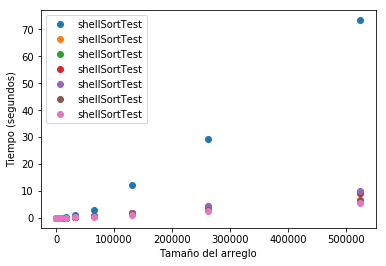

In [17]:
for r in resultados:
    plotResults(r, 'o')